# EDA

Citations  
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand  
https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction?resource=download  

#### Additional Information  

Date : year-month-day  
Rented Bike count - Count of bikes rented at each hour  
Hour - Hour of he day  
Temperature-Temperature in Celsius  
Humidity - %  
Windspeed - m/s  
Visibility - 10m  
Dew point temperature - Celsius   
Solar radiation - MJ/m2  
Rainfall - mm  
Snowfall - cm  
Seasons - Winter, Spring, Summer, Autumn  
Holiday - Holiday/No holiday  
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)  



In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('datasets/SeoulBikeData.csv', encoding='latin-1')
data.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [3]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
data.columns.tolist()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [12]:
data.rename(columns={'Temperature(°C)':'Temp', 
                     'Dew point temperature(°C)':'Dew_temp',
                     'Humidity(%)':'Humidity'},
           inplace=True)

In [13]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temp', 'Humidity',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew_temp',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [16]:
data.drop(['Date', 'Holiday', 'Seasons'], axis=1, inplace=True)

KeyError: "['Date', 'Holiday', 'Seasons'] not found in axis"

In [17]:
data.columns

Index(['Rented Bike Count', 'Hour', 'Temp', 'Humidity', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew_temp', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Functioning Day'],
      dtype='object')

In [18]:
data['Functioning Day'] = (data['Functioning Day']=='Yes').astype(int)

In [19]:
data.head()

,Rented Bike Count,Hour,Temp,Humidity,Wind speed (m/s),Visibility (10m),Dew_temp,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [21]:
df12 = data[data['Hour'] == 12]
df12.head()

,Rented Bike Count,Hour,Temp,Humidity,Wind speed (m/s),Visibility (10m),Dew_temp,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [23]:
data.drop(['Hour'], axis=1, inplace=True)
data.columns

Index(['Rented Bike Count', 'Temp', 'Humidity', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew_temp', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Functioning Day'],
      dtype='object')

In [26]:
cols = data.columns.to_list()

In [27]:
cols

['Rented Bike Count',
 'Temp',
 'Humidity',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew_temp',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Functioning Day']

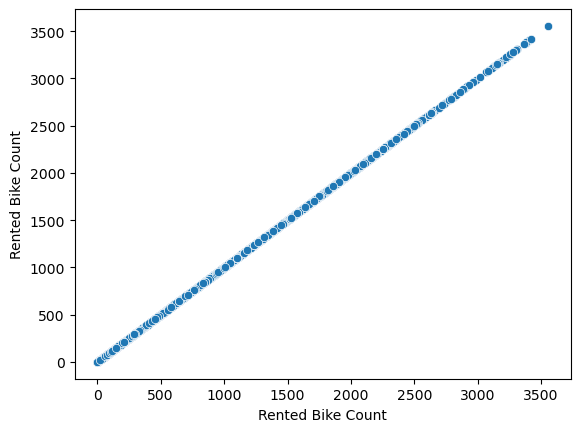

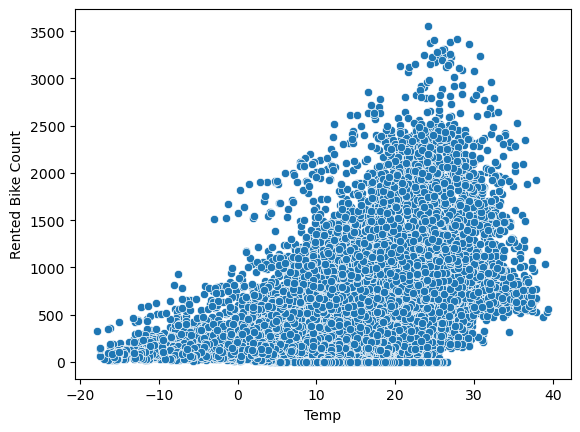

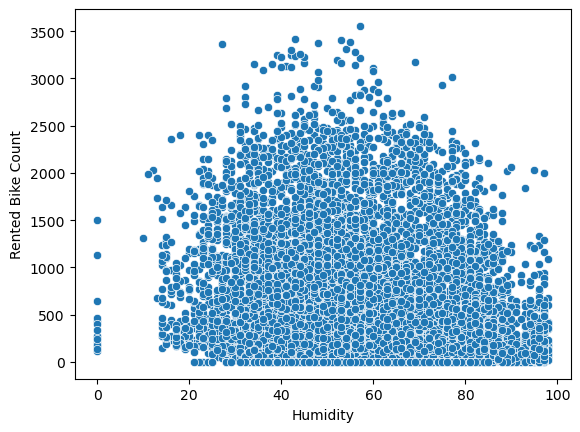

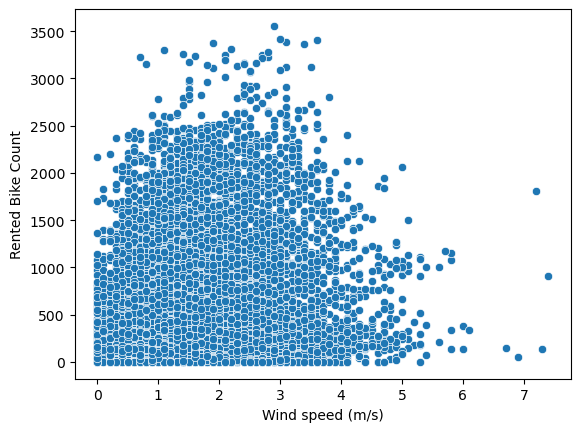

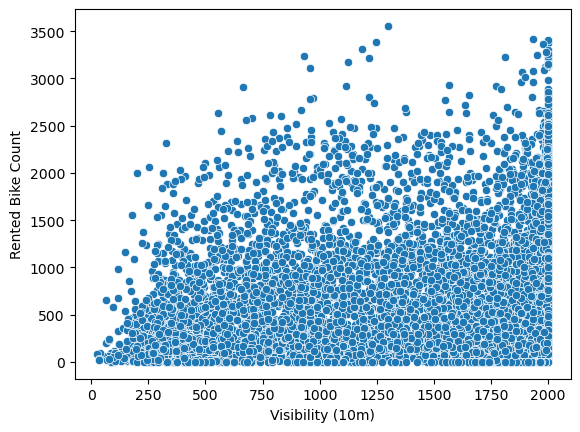

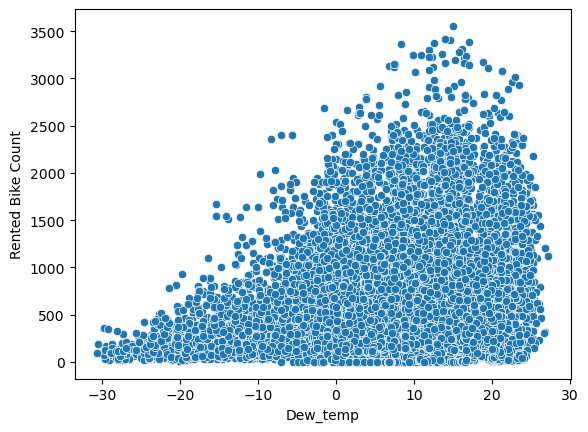

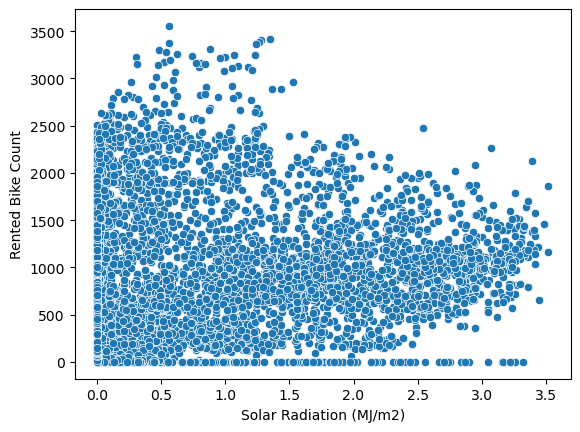

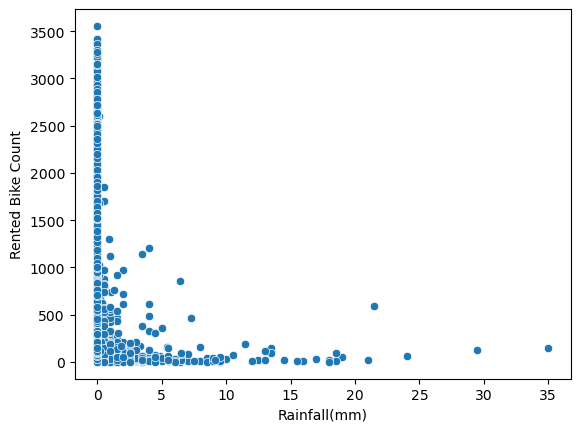

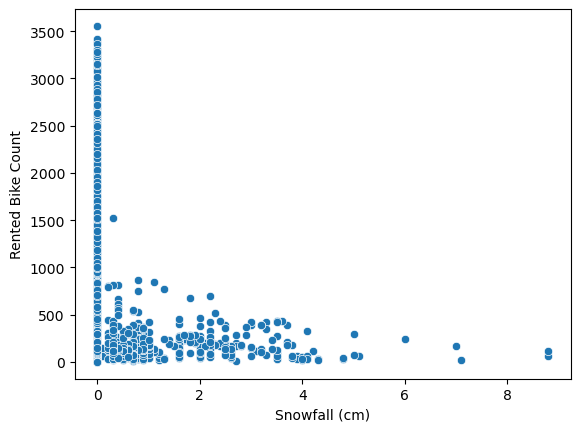

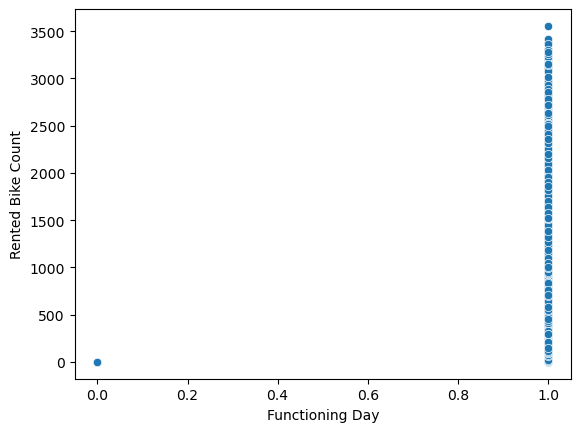

In [29]:
for col in cols:
    sns.scatterplot(x=data[col], y=data['Rented Bike Count'])
    plt.show()

In [30]:
cols

['Rented Bike Count',
 'Temp',
 'Humidity',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew_temp',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Functioning Day']

In [31]:
data['Functioning Day'].value_counts()

1    8465
0     295
Name: Functioning Day, dtype: int64

In [32]:
data.drop(columns=['Wind speed (m/s)', 'Visibility (10m)', 'Functioning Day'], inplace=True)

In [33]:
data.columns

Index(['Rented Bike Count', 'Temp', 'Humidity', 'Dew_temp',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [34]:
data.to_csv('Seoul Bikes Clean', index=False, encoding='utf-8')